In [1]:
# Install ucimlrepo for downloading the data using python

# %pip install ucimlrepo

In [2]:
# download heart disease data

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
#print(heart_disease.metadata) 
  
# variable information 
#print(heart_disease.variables) 


## Description of the features from the UCI website

1. **age (int):** age in years
2. **sex (cat):** sex (1 = male; 0 = female)
3. **cp (cat):** chest pain type

        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic

4. **trestbps (int):** resting blood pressure (in mm Hg on admission to the hospital)
5. **chol (int):** serum cholestoral in mg/dl
6. **fbs (cat):** (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. **restecg (cat):** resting electrocardiographic results

        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. **thalach (int):** maximum heart rate achieved
9. **exang (cat):** exercise induced angina (1 = yes; 0 = no)
10. **oldpeak (int):** = ST depression induced by exercise relative to rest
11. **slope (cat):** the slope of the peak exercise ST segment

        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping

12. **ca (int):** number of major vessels (0-3) colored by flourosopy
13. **thal (cat):** 3 = normal; 6 = fixed defect; 7 = reversable defect
14. **num (cat):** diagnosis of heart disease (angiographic disease status)

        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing

In [3]:
# Importing libraries for data processing, analysis, and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [4]:
# Importing libraries for machine learning models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# Setting the plotting theme to seaborn default

sns.set_theme()

In [6]:
# Exploring feature variable

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [7]:
# X dimensions

X.shape

(303, 13)

In [8]:
# data types and null values

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [9]:
# Statistical summary

X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
# viewing target column

y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [11]:
# Merging X and y to single dataframe for analysis

all_df = pd.merge(X,y, left_index=True, right_index=True)

In [12]:
# Viewing top 5 rows

all_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [13]:
# Dimensions of merged dataframe

all_df.shape

(303, 14)

In [14]:
# Data types and missing values by column

all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


## Missing Data Cleanup

In [15]:
# Checking rows with missing data

all_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [16]:
# Total number of rows with any missing value

all_df.isna().any(axis=1).sum()

6

In [17]:
# Total percentage of observations with any missing value

(all_df.isna().any(axis=1).sum()/len(all_df)*100).round(2)

1.98

In [18]:
# Inspecting rows with missing 'ca'

all_df[all_df['ca'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [19]:
# Inspecting rows with missing 'thal'

all_df[all_df['thal'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2


In [20]:
# Unique values for 'ca'

sorted(all_df['ca'].unique())

[0.0, 1.0, 2.0, 3.0, nan]

In [21]:
# Distribution of 'ca' values

all_df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [22]:
# Unique values for 'thal'

sorted(all_df['thal'].unique())

[3.0, 6.0, 7.0, nan]

In [23]:
# Distribution of 'thal' values

all_df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64

In [24]:
# Safe to drop all rows containing missing values in either 'ca' or 'thal'

all_df.dropna(inplace=True)

In [25]:
# checking number of rows dropped

all_df.shape

(297, 14)

## Data Type Conversion

In [26]:
# printing column names

all_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [27]:
# crearting lists for categorical and numeric columns

num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']

In [28]:
# Unique values for 'sex'

for col in cat:
    print(f'Printing unique values for {col}:')
    print(sorted(all_df[col].unique()))

Printing unique values for sex:
[0, 1]
Printing unique values for cp:
[1, 2, 3, 4]
Printing unique values for fbs:
[0, 1]
Printing unique values for restecg:
[0, 1, 2]
Printing unique values for exang:
[0, 1]
Printing unique values for slope:
[1, 2, 3]
Printing unique values for thal:
[3.0, 6.0, 7.0]
Printing unique values for num:
[0, 1, 2, 3, 4]


In [29]:
# Creating dictionary for mapping numeric to labels

sex_dict = {0: 'female',
            1: 'male'}

cp_dict = {1: 'typical_angina',
           2: 'atypical_angina',
           3: 'non-anginal_pain',
           4: 'asymptomatic'}

fbs_dict = {0: 'le_120',
            1: 'gt_120'}

restecg_dict = {0: 'normal',
                1: 'wave_abnormality',
                2: 'ventricular_hypertrophy'}

exang_dict = {0: 'no',
              1: 'yes'}

slope_dict = {1: 'upsloping',
              2: 'flat',
              3: 'downsloping'}

thal_dict = {3: 'normal',
             6: 'fixed_defect',
             7: 'reversable_defect'}

num_dict = {0: 'no',
            1: 'yes',
            2: 'yes',
            3: 'yes',
            4: 'yes'}



In [30]:
# Using mapping disctionary to label categories and saving as a new column

all_df['sex1'] = all_df['sex'].map(sex_dict)

all_df['cp1'] = all_df['cp'].map(cp_dict)

all_df['fbs1'] = all_df['fbs'].map(fbs_dict)

all_df['restecg1'] = all_df['restecg'].map(restecg_dict)

all_df['exang1'] = all_df['exang'].map(exang_dict)

all_df['slope1'] = all_df['slope'].map(slope_dict)

all_df['thal1'] = all_df['thal'].map(thal_dict)

all_df['num1'] = all_df['num'].map(num_dict)

In [31]:
# viewing after conversion

all_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,num,sex1,cp1,fbs1,restecg1,exang1,slope1,thal1,num1
0,63,1,1,145,233,1,2,150,0,2.3,...,6.0,0,male,typical_angina,gt_120,ventricular_hypertrophy,no,downsloping,fixed_defect,no
1,67,1,4,160,286,0,2,108,1,1.5,...,3.0,2,male,asymptomatic,le_120,ventricular_hypertrophy,yes,flat,normal,yes
2,67,1,4,120,229,0,2,129,1,2.6,...,7.0,1,male,asymptomatic,le_120,ventricular_hypertrophy,yes,flat,reversable_defect,yes
3,37,1,3,130,250,0,0,187,0,3.5,...,3.0,0,male,non-anginal_pain,le_120,normal,no,downsloping,normal,no
4,41,0,2,130,204,0,2,172,0,1.4,...,3.0,0,female,atypical_angina,le_120,ventricular_hypertrophy,no,upsloping,normal,no


In [32]:
# Creating list of column to select from the dataframe

new_cat = ['sex1', 'cp1', 'fbs1', 'restecg1', 'exang1', 'slope1', 'thal1', 'num1']

new_columns =  num + new_cat

In [33]:
# Collecting new categorical columns and existing numerical columns in a new dataframe

new_df = all_df[new_columns]
new_df.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex1,cp1,fbs1,restecg1,exang1,slope1,thal1,num1
0,63,145,233,150,2.3,0.0,male,typical_angina,gt_120,ventricular_hypertrophy,no,downsloping,fixed_defect,no
1,67,160,286,108,1.5,3.0,male,asymptomatic,le_120,ventricular_hypertrophy,yes,flat,normal,yes
2,67,120,229,129,2.6,2.0,male,asymptomatic,le_120,ventricular_hypertrophy,yes,flat,reversable_defect,yes
3,37,130,250,187,3.5,0.0,male,non-anginal_pain,le_120,normal,no,downsloping,normal,no
4,41,130,204,172,1.4,0.0,female,atypical_angina,le_120,ventricular_hypertrophy,no,upsloping,normal,no


In [34]:
# update column names to be more descriptive

new_columns_updated = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'gender', 'cp', 'fbs', 'restecg', 'exang',
                       'slope', 'thal', 'disease']
new_df.columns = new_columns_updated
new_df.head()

,age,trestbps,chol,thalach,oldpeak,ca,gender,cp,fbs,restecg,exang,slope,thal,disease
0,63,145,233,150,2.3,0.0,male,typical_angina,gt_120,ventricular_hypertrophy,no,downsloping,fixed_defect,no
1,67,160,286,108,1.5,3.0,male,asymptomatic,le_120,ventricular_hypertrophy,yes,flat,normal,yes
2,67,120,229,129,2.6,2.0,male,asymptomatic,le_120,ventricular_hypertrophy,yes,flat,reversable_defect,yes
3,37,130,250,187,3.5,0.0,male,non-anginal_pain,le_120,normal,no,downsloping,normal,no
4,41,130,204,172,1.4,0.0,female,atypical_angina,le_120,ventricular_hypertrophy,no,upsloping,normal,no


In [35]:
# checking the data type of the new dataframe

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   trestbps  297 non-null    int64  
 2   chol      297 non-null    int64  
 3   thalach   297 non-null    int64  
 4   oldpeak   297 non-null    float64
 5   ca        297 non-null    float64
 6   gender    297 non-null    object 
 7   cp        297 non-null    object 
 8   fbs       297 non-null    object 
 9   restecg   297 non-null    object 
 10  exang     297 non-null    object 
 11  slope     297 non-null    object 
 12  thal      297 non-null    object 
 13  disease   297 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 34.8+ KB


## Univariate Analysis

In [36]:
# Function to explore categorical columns

def cat_exp(df, col):

    print(f'Exploring Data Distribution for Categorical Variable: {col} \n')
    
    # Counting number of observations in each category
    count_df = pd.DataFrame(df[col].value_counts()).sort_index().reset_index()
    count_df.columns = [col, 'count']
    print(count_df)

    # Sorting values for plotting
    df = df.sort_values([col])

    # Plotting count chart for categories
    fig= plt.figure(figsize=(12,8))
    ax = fig.add_subplot()
    sns.histplot(df, x=col)
    ax.set_title('Count of Observations')
    plt.show()



In [37]:
# Function to explore numerical columns

def num_exp(df, col):

    print(f'Exploring Data Distribution for Numerical Variable: {col} \n')

    # Data distribution statistics
    print(pd.DataFrame(df[col].describe().round(2)).T)

    # Plottting histogram and Box-plot
    fig= plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    sns.histplot(df, x=col, ax=ax1)
    ax1.set_title(f'Distribution of {col}')
    sns.boxplot(x=df[col], ax=ax2)
    plt.show()
    

Exploring Data Distribution for Numerical Variable: age 

     count   mean   std   min   25%   50%   75%   max
age  297.0  54.54  9.05  29.0  48.0  56.0  61.0  77.0


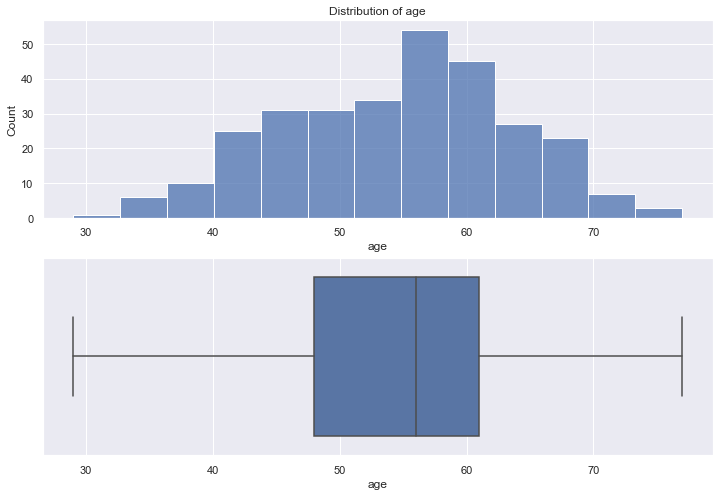

Exploring Data Distribution for Numerical Variable: trestbps 

          count    mean    std   min    25%    50%    75%    max
trestbps  297.0  131.69  17.76  94.0  120.0  130.0  140.0  200.0


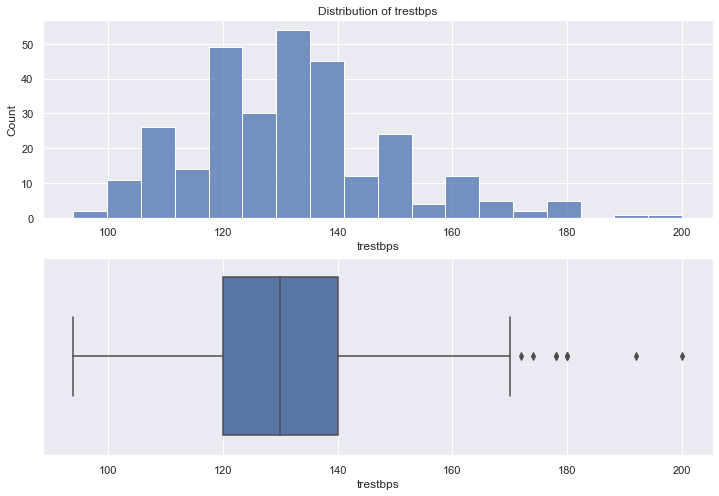

Exploring Data Distribution for Numerical Variable: chol 

      count    mean   std    min    25%    50%    75%    max
chol  297.0  247.35  52.0  126.0  211.0  243.0  276.0  564.0


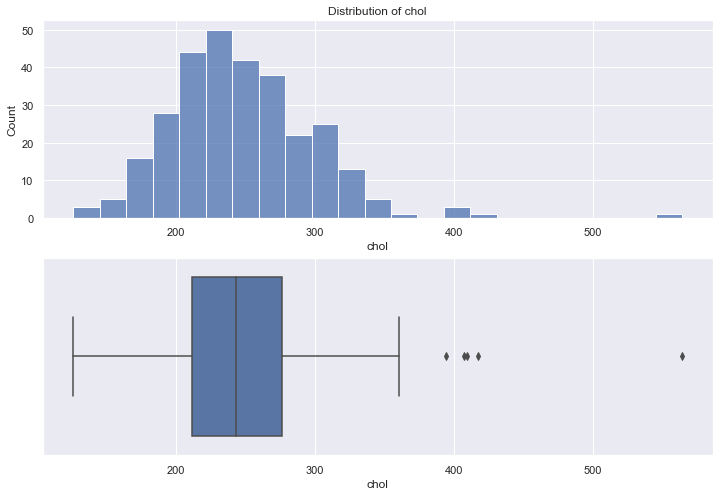

Exploring Data Distribution for Numerical Variable: thalach 

         count   mean    std   min    25%    50%    75%    max
thalach  297.0  149.6  22.94  71.0  133.0  153.0  166.0  202.0


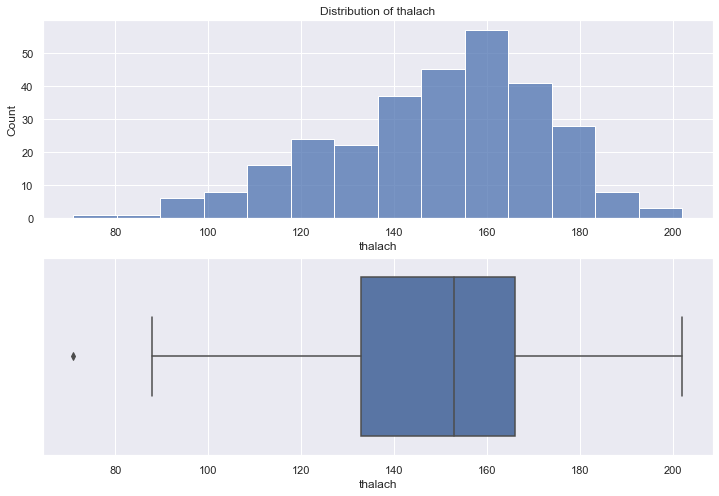

Exploring Data Distribution for Numerical Variable: oldpeak 

         count  mean   std  min  25%  50%  75%  max
oldpeak  297.0  1.06  1.17  0.0  0.0  0.8  1.6  6.2


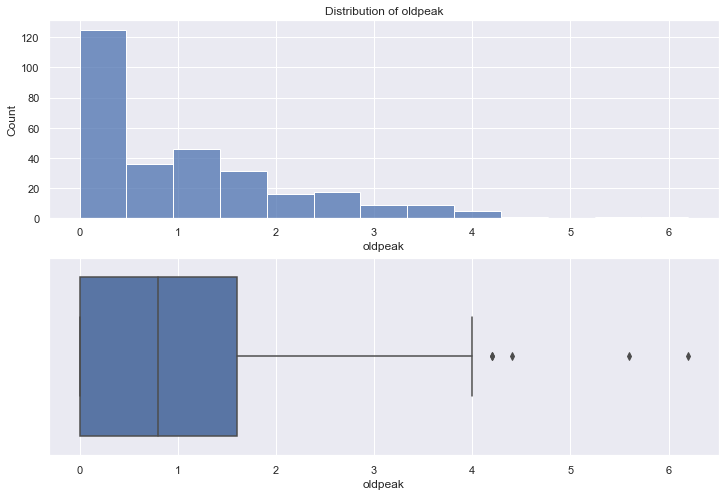

Exploring Data Distribution for Numerical Variable: ca 

    count  mean   std  min  25%  50%  75%  max
ca  297.0  0.68  0.94  0.0  0.0  0.0  1.0  3.0


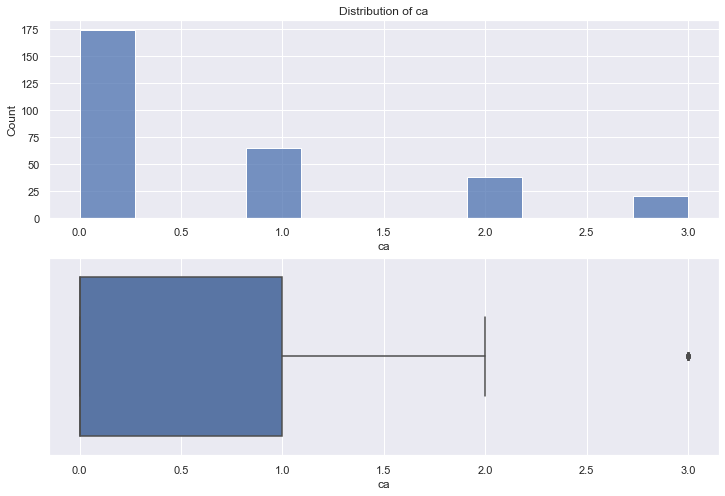

In [38]:
# Using a loop to explore all numeric values using function

for col in num:
    num_exp(new_df, col)

In [39]:
# Creating list of new categorical columns

cat_updated = ['gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'disease']

Exploring Data Distribution for Categorical Variable: gender 

   gender  count
0  female     96
1    male    201


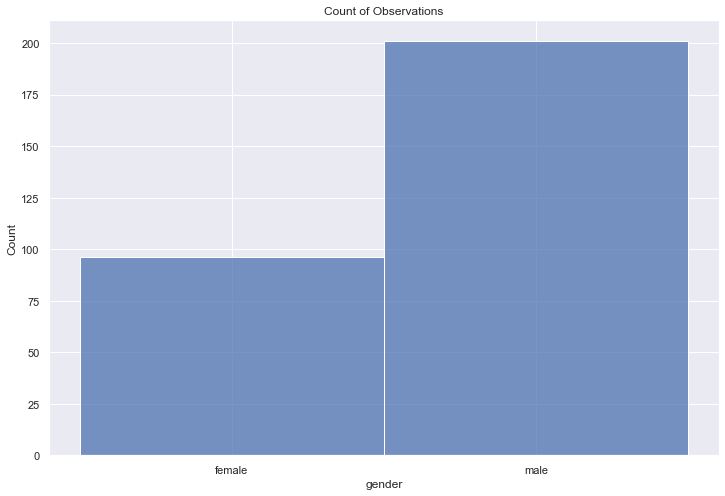

Exploring Data Distribution for Categorical Variable: cp 

                 cp  count
0      asymptomatic    142
1   atypical_angina     49
2  non-anginal_pain     83
3    typical_angina     23


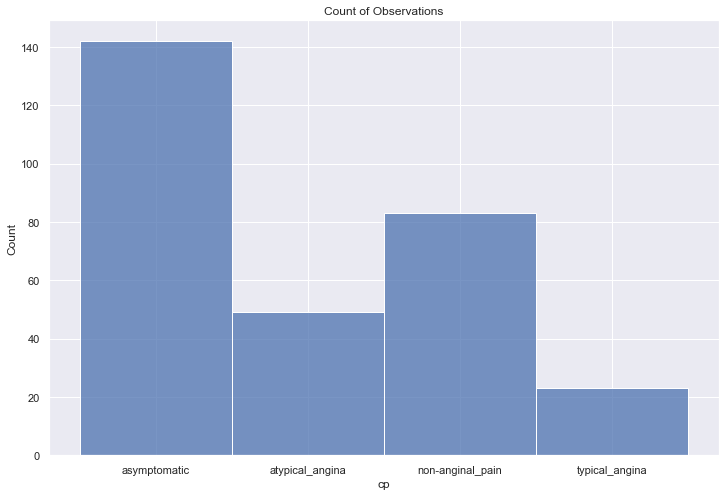

Exploring Data Distribution for Categorical Variable: fbs 

      fbs  count
0  gt_120     43
1  le_120    254


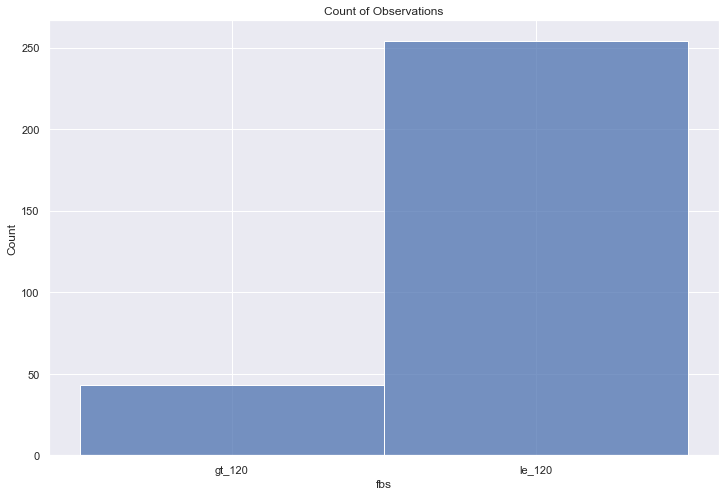

Exploring Data Distribution for Categorical Variable: restecg 

                   restecg  count
0                   normal    147
1  ventricular_hypertrophy    146
2         wave_abnormality      4


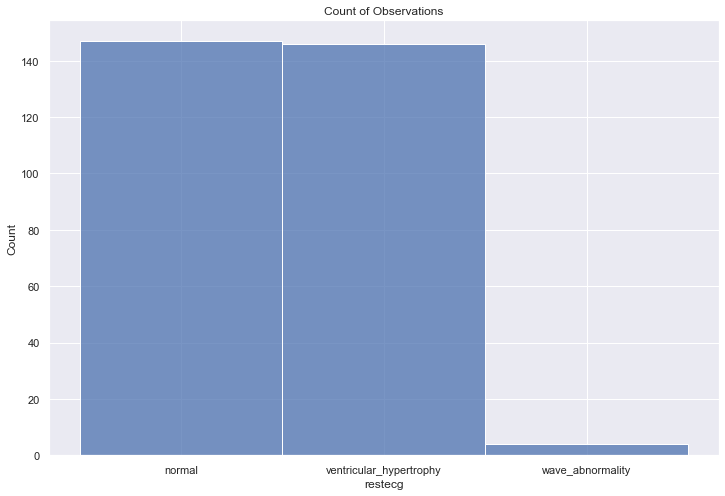

Exploring Data Distribution for Categorical Variable: exang 

  exang  count
0    no    200
1   yes     97


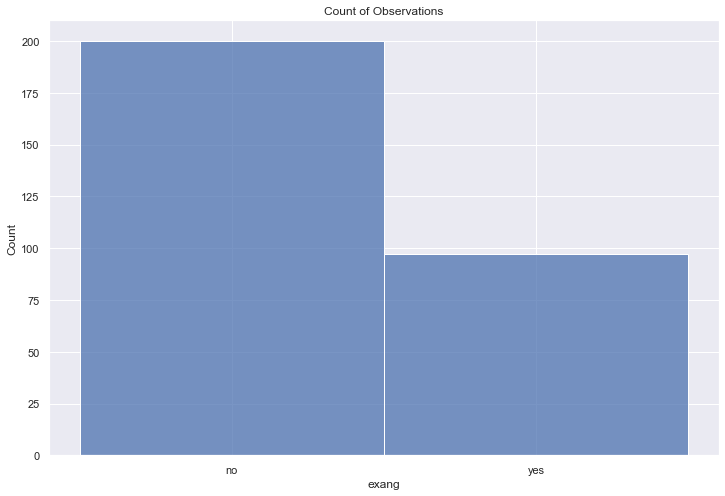

Exploring Data Distribution for Categorical Variable: slope 

         slope  count
0  downsloping     21
1         flat    137
2    upsloping    139


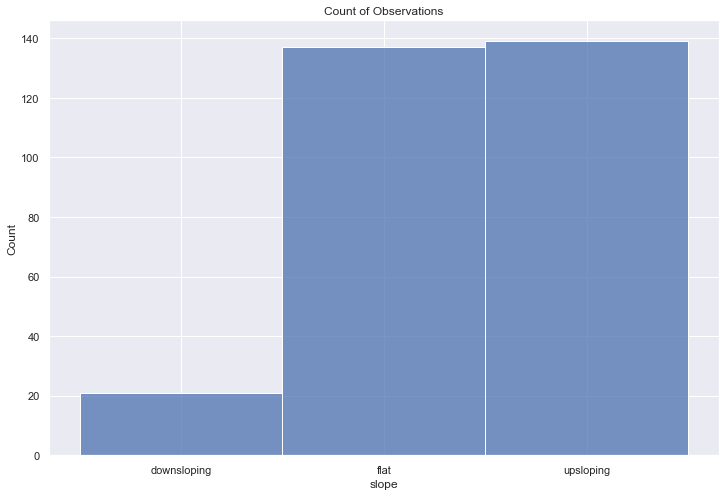

Exploring Data Distribution for Categorical Variable: thal 

                thal  count
0       fixed_defect     18
1             normal    164
2  reversable_defect    115


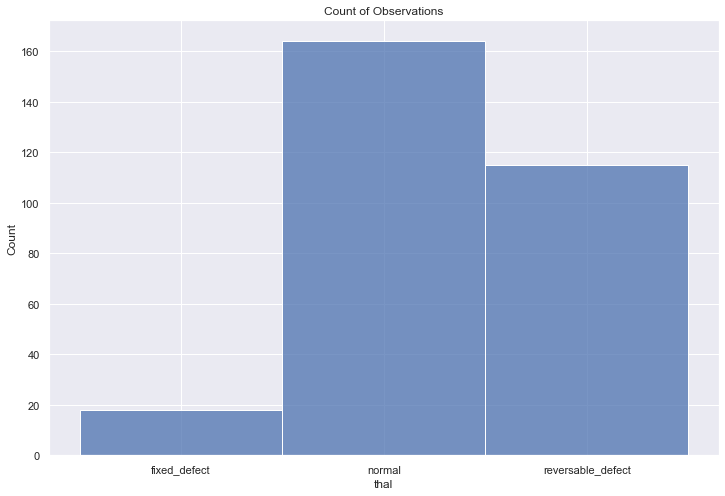

Exploring Data Distribution for Categorical Variable: disease 

  disease  count
0      no    160
1     yes    137


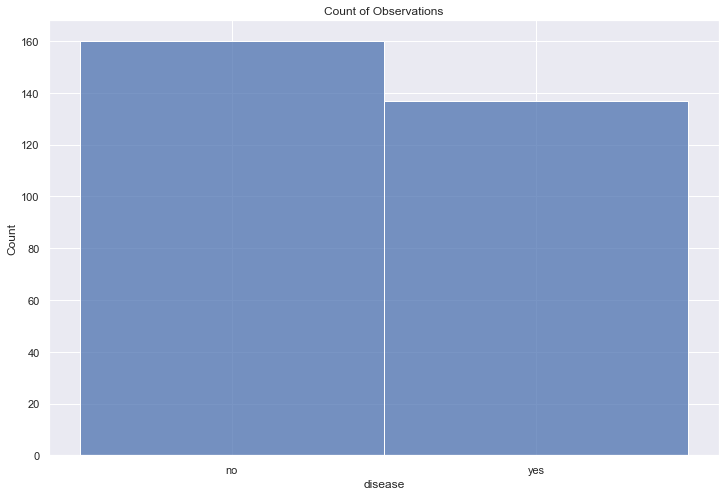

In [40]:
# Looping through all categorical columns to explore data using function

for col in cat_updated:
    cat_exp(new_df, col)

## Bivariate Analysis (with target)

Exploring numerical and categorical variables with target (disease) column

In [41]:
# Function to explore categorical columns vs target column

def cat_target_exp(df, col, target):

    print(f'Exploring Data Distribution of {col} by {target}\n')
    
    # Counting number of observations in each category grouped by disease
    summary = (pd.crosstab(index=df[target], columns=df[col]))
    print(summary)

    # Plotting count chart for categories grouped by disease
    fig= plt.figure(figsize=(12,8))
    ax = fig.add_subplot()
    summary.T.plot.barh(stacked=True, ax=ax)
    ax.set_xlabel('Percentage')
    ax.set_title(f'Percentage of {target} by {col}')
    plt.show()



In [42]:
# Function to explore numerical columns

def num_target_exp(df, col, target):

    print(f'Exploring Data Distribution of {col} by {target}\n')

    # Data distribution statistics grouped by disease
    print(df.groupby(target)[col].describe().round(2))

    # Plottting distribution by disease
    fig= plt.figure(figsize=(12,8))
    ax = fig.add_subplot()
    sns.violinplot(data=df, x=col, y=target, ax=ax)
    ax.set_title(f'Distribution of {col}')
    plt.show()
    

Exploring Data Distribution of gender by disease

gender   female  male
disease              
no           71    89
yes          25   112


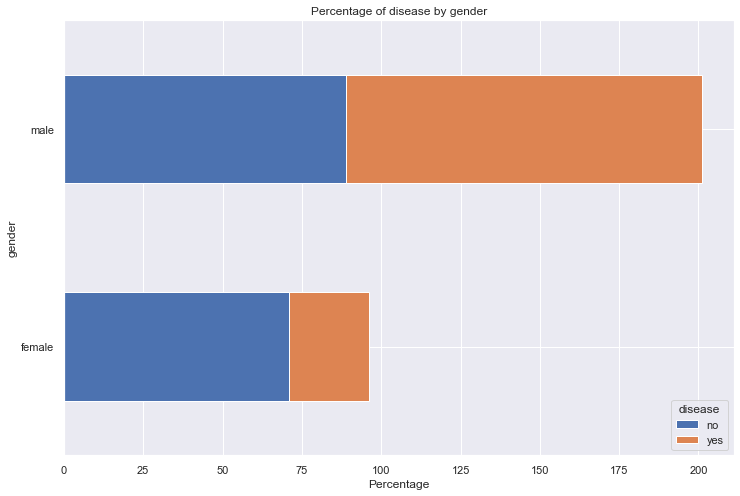

Exploring Data Distribution of cp by disease

cp       asymptomatic  atypical_angina  non-anginal_pain  typical_angina
disease                                                                 
no                 39               40                65              16
yes               103                9                18               7


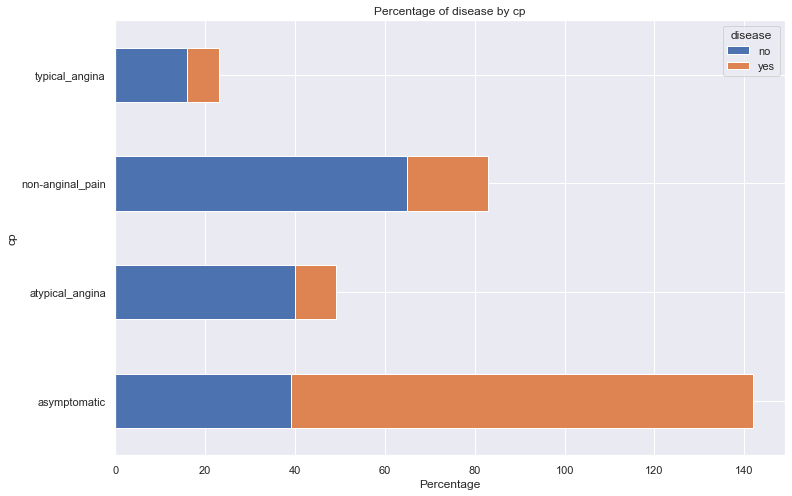

Exploring Data Distribution of fbs by disease

fbs      gt_120  le_120
disease                
no           23     137
yes          20     117


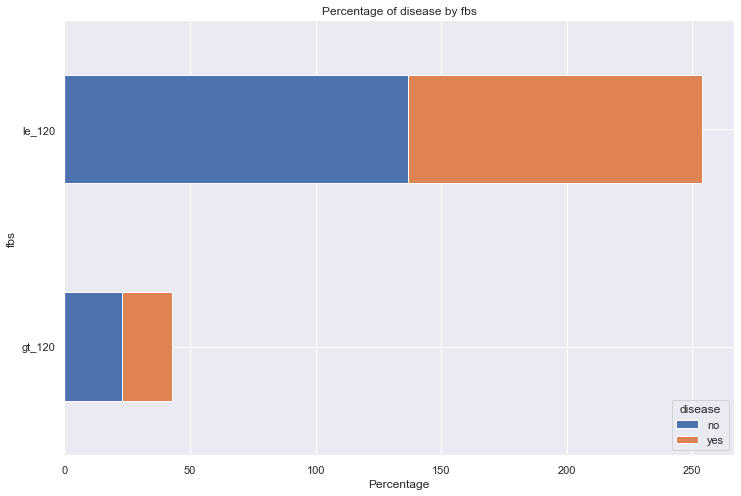

Exploring Data Distribution of restecg by disease

restecg  normal  ventricular_hypertrophy  wave_abnormality
disease                                                   
no           92                       67                 1
yes          55                       79                 3


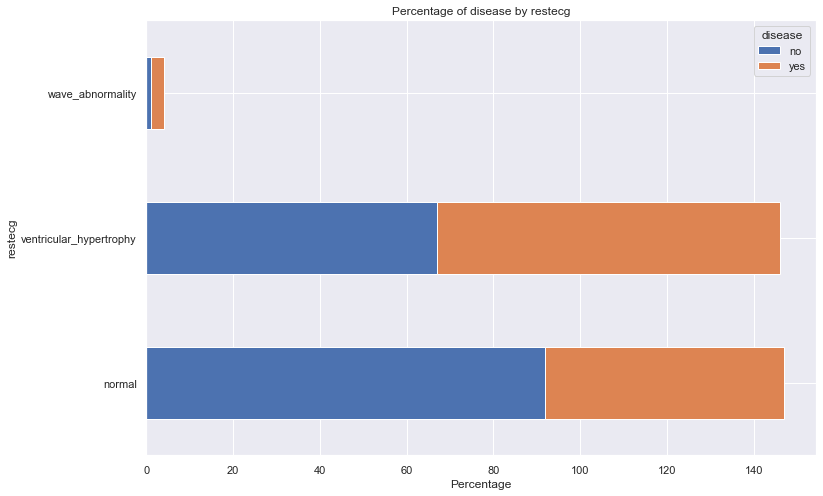

Exploring Data Distribution of exang by disease

exang     no  yes
disease          
no       137   23
yes       63   74


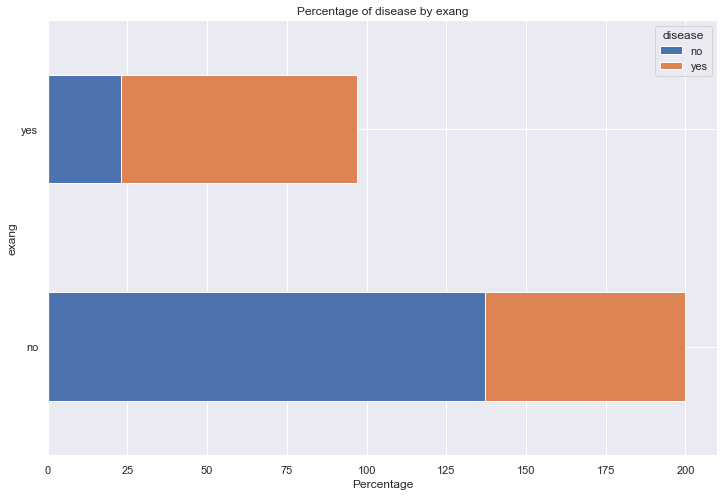

Exploring Data Distribution of slope by disease

slope    downsloping  flat  upsloping
disease                              
no                 9    48        103
yes               12    89         36


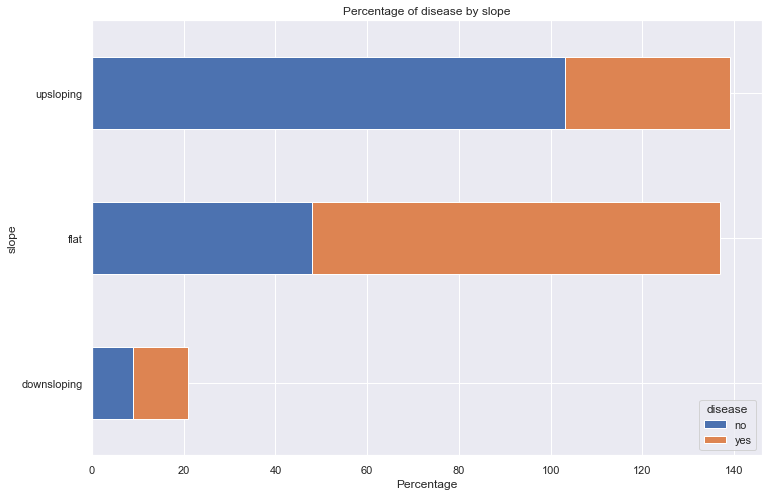

Exploring Data Distribution of thal by disease

thal     fixed_defect  normal  reversable_defect
disease                                         
no                  6     127                 27
yes                12      37                 88


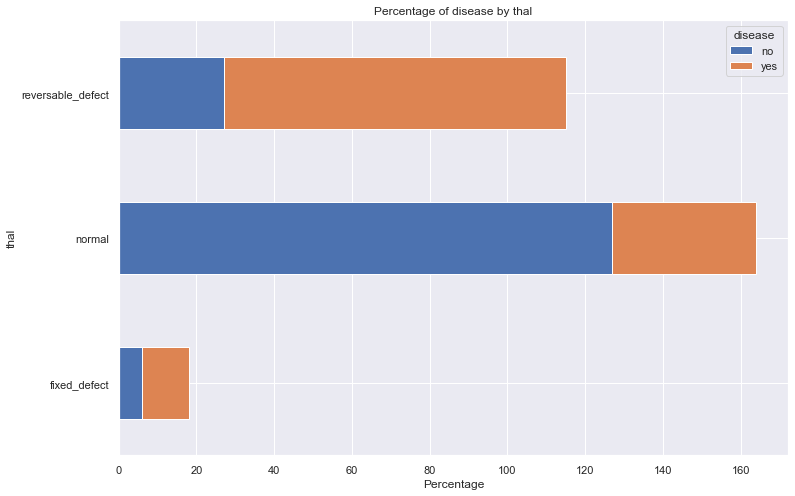

In [43]:
# Defining target
target = 'disease'


# Using loop to explore categorical variables by disease
for col in cat_updated:
    if col != target:
        cat_target_exp(new_df, col, target)

Exploring Data Distribution of age by disease

         count   mean   std   min    25%   50%   75%   max
disease                                                   
no       160.0  52.64  9.55  29.0  44.75  52.0  59.0  76.0
yes      137.0  56.76  7.90  35.0  53.00  58.0  62.0  77.0


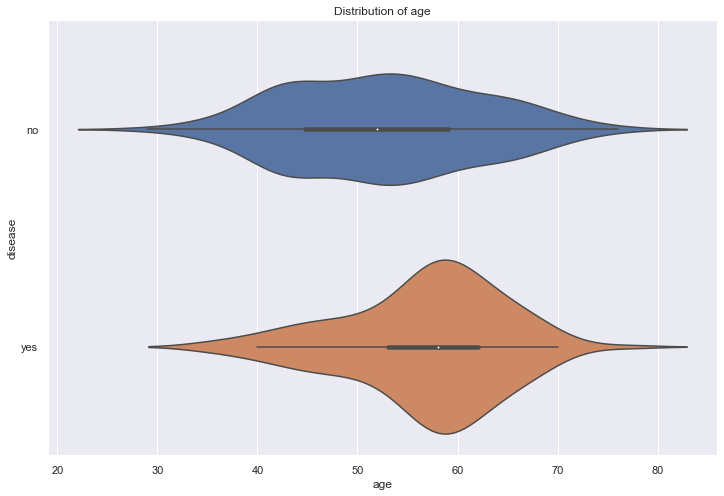

Exploring Data Distribution of trestbps by disease

         count    mean    std    min    25%    50%    75%    max
disease                                                         
no       160.0  129.18  16.37   94.0  120.0  130.0  140.0  180.0
yes      137.0  134.64  18.90  100.0  120.0  130.0  145.0  200.0


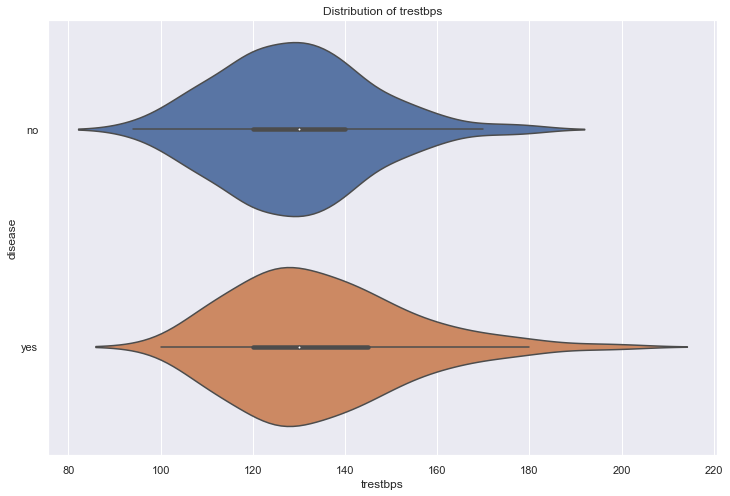

Exploring Data Distribution of chol by disease

         count    mean    std    min     25%    50%     75%    max
disease                                                           
no       160.0  243.49  53.76  126.0  208.75  235.5  268.25  564.0
yes      137.0  251.85  49.68  131.0  218.00  253.0  284.00  409.0


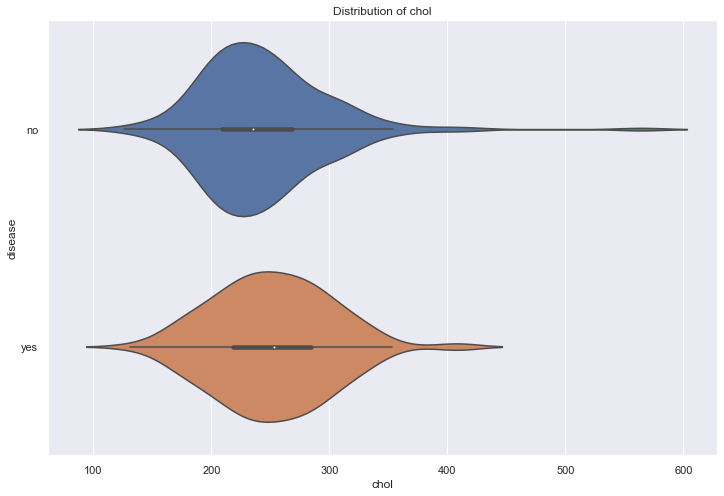

Exploring Data Distribution of thalach by disease

         count    mean    std   min    25%    50%    75%    max
disease                                                        
no       160.0  158.58  19.04  96.0  149.0  161.0  172.0  202.0
yes      137.0  139.11  22.71  71.0  125.0  142.0  157.0  195.0


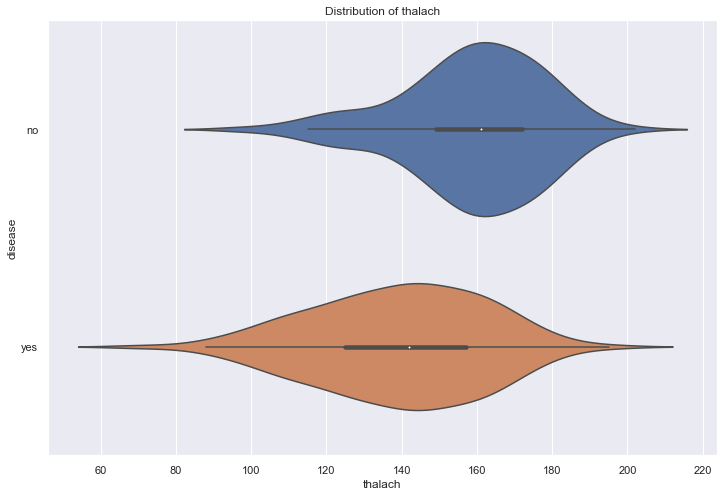

Exploring Data Distribution of oldpeak by disease

         count  mean   std  min  25%  50%  75%  max
disease                                            
no       160.0  0.60  0.79  0.0  0.0  0.2  1.1  4.2
yes      137.0  1.59  1.31  0.0  0.6  1.4  2.5  6.2


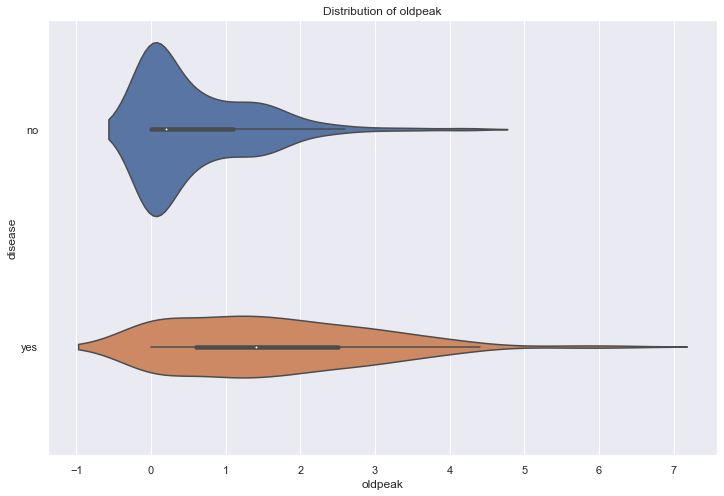

Exploring Data Distribution of ca by disease

         count  mean   std  min  25%  50%  75%  max
disease                                            
no       160.0  0.28  0.63  0.0  0.0  0.0  0.0  3.0
yes      137.0  1.15  1.02  0.0  0.0  1.0  2.0  3.0


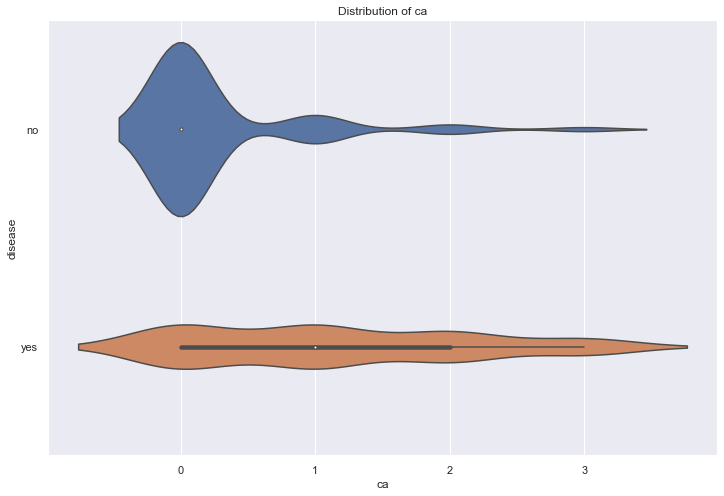

In [44]:
# Looping through numerical variables to explore by disease

for col in num:
    if col != target:
        num_target_exp(new_df, col, target)

In [45]:
# Printing the correlation coefficient matrix

corr = new_df[num].corr().round(2)
print(corr)

           age  trestbps  chol  thalach  oldpeak    ca
age       1.00      0.29  0.20    -0.39     0.20  0.36
trestbps  0.29      1.00  0.13    -0.05     0.19  0.10
chol      0.20      0.13  1.00    -0.00     0.04  0.12
thalach  -0.39     -0.05 -0.00     1.00    -0.35 -0.27
oldpeak   0.20      0.19  0.04    -0.35     1.00  0.29
ca        0.36      0.10  0.12    -0.27     0.29  1.00


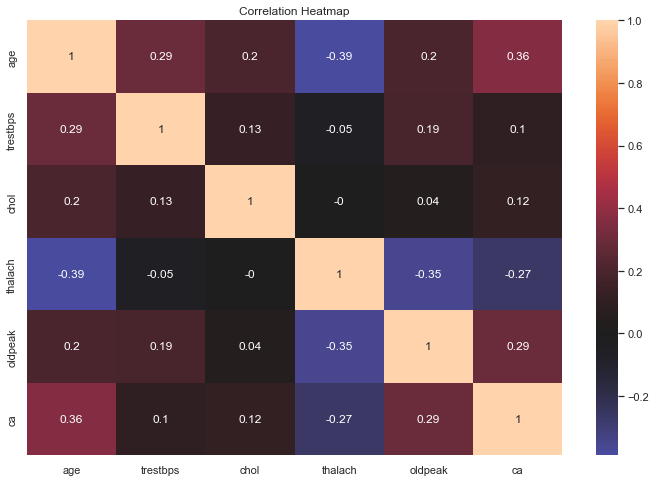

In [46]:
# Plotting the correlation coefficient matrix as heatmap

fig= plt.figure(figsize=(12,8))
ax = fig.add_subplot()
sns.heatmap(corr, center=0.0, annot=True, ax=ax)
ax.set_title(f'Correlation Heatmap')
plt.show()


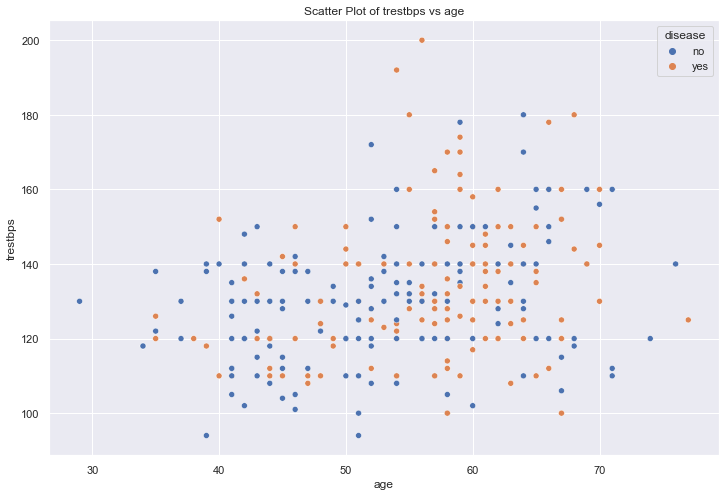

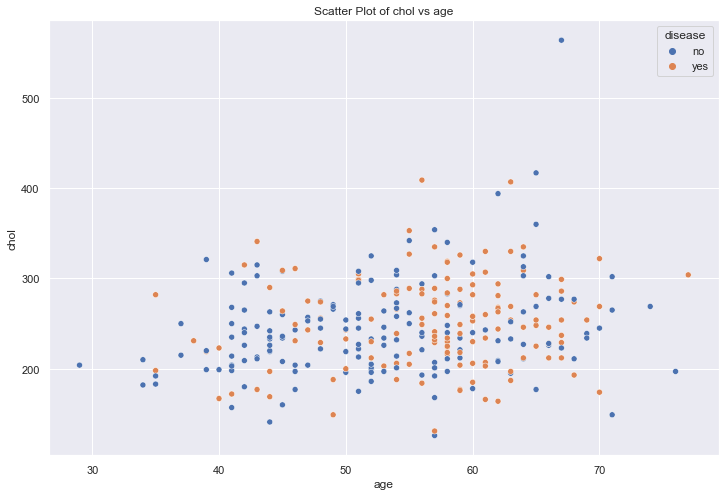

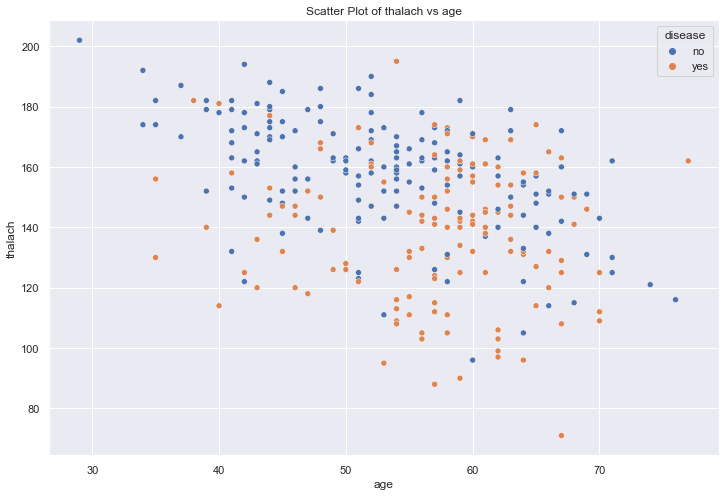

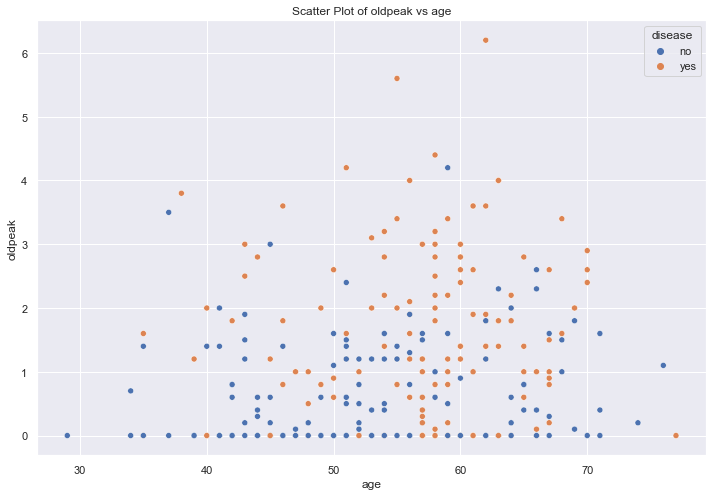

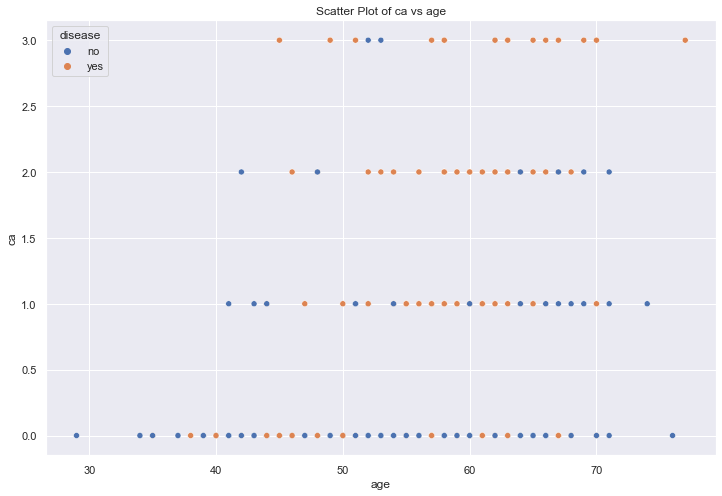

In [47]:
# Exploring scatter chart plot of other numerical variables with age to visualize the correlations

for col in num:
    if col != 'age':
        fig= plt.figure(figsize=(12,8))
        ax = fig.add_subplot()
        sns.scatterplot(data=new_df, x='age', y=col, hue='disease', ax=ax)
        ax.set_title(f'Scatter Plot of {col} vs age')
        plt.show()

## Feature Engineering

In [48]:
# Creating a new feature dataframe by adding the numerical columns

feat_df = new_df[num]

feat_df.head()

,age,trestbps,chol,thalach,oldpeak,ca
0,63,145,233,150,2.3,0.0
1,67,160,286,108,1.5,3.0
2,67,120,229,129,2.6,2.0
3,37,130,250,187,3.5,0.0
4,41,130,204,172,1.4,0.0


In [49]:
# Creating one-hot encoding for categorical features

cat_dummies = pd.get_dummies(new_df[cat_updated], drop_first=True)

In [50]:
# Adding the one-hot encoded features to the features dataframe

feat_df = feat_df.merge(cat_dummies, left_index=True, right_index=True)

In [51]:
# Extracting X (features) and y (target) from features dataframe

X_final = feat_df.drop(['disease_yes'], axis=1)
y_final = feat_df['disease_yes']

In [52]:
# Splitting the feature and target into train and test groups (70% train, 30% test)

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

In [53]:
# Scaling the features using Min-Max Scaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [54]:
# Using Logistic Regression model to train and score

clf_lr = LogisticRegression(random_state=42)

clf_lr.fit(X_train_scaled, y_train)

score = clf_lr.score(X_test_scaled, y_test)

print(f'Score for Logistic Regression: {score}')

Score for Logistic Regression: 0.9


In [55]:
# Predict y values for creating reports

y_pred = clf_lr.predict(X_test_scaled)

In [56]:
# Printing classification report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        49
           1       0.94      0.83      0.88        41

    accuracy                           0.90        90
   macro avg       0.91      0.89      0.90        90
weighted avg       0.90      0.90      0.90        90



In [57]:
# Printing confusion matrix

print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[47  2]
 [ 7 34]]


In [58]:
# Printing TN, TP, FN, FP values

tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()

print(f'True Negative: {tn}')
print(f'True Positive: {tp}')
print(f'False Negative: {fn}')
print(f'False Positive: {fp}')

True Negative: 47
True Positive: 34
False Negative: 7
False Positive: 2


In [59]:
# Printing Linear Regression coefficients

print(clf_lr.coef_)

[[ 0.16527339  0.8372696   0.56226127 -0.94629875  0.92199703  2.3546973
   0.99895791 -0.2435936  -1.25375316 -0.74438053  0.37650214  0.27139474
  -0.01793509  0.62772805  0.27964542 -0.44261825 -0.50788558  0.7996478 ]]


In [60]:
# Scaling coefficients to identify feature importance
# Source: https://stackoverflow.com/questions/34052115/how-to-find-the-importance-of-the-features-for-a-logistic-regression-model

print(np.std(X_train_scaled, 0)*clf_lr.coef_)

[[ 0.03091326  0.14577195  0.06865593 -0.16872384  0.18480494  0.76104402
   0.45965117 -0.08454823 -0.56597671 -0.20437413  0.13782522  0.13523898
  -0.00175439  0.29798872  0.13974274 -0.22037489 -0.25263263  0.39026192]]


In [61]:
# Creating dataframe with features and importance scores

scaled_coef = np.std(X_train_scaled, 0)*clf_lr.coef_[0]
feat_columns = X_train.columns
feature_imp = list(zip(feat_columns, scaled_coef))
feat_imp_df = pd.DataFrame(feature_imp, columns=['feature', 'score'])

print(feat_imp_df.sort_values(by='score', ascending=False))


                            feature     score
5                                ca  0.761044
6                       gender_male  0.459651
17           thal_reversable_defect  0.390262
13                        exang_yes  0.297989
4                           oldpeak  0.184805
1                          trestbps  0.145772
14                       slope_flat  0.139743
10                       fbs_le_120  0.137825
11  restecg_ventricular_hypertrophy  0.135239
2                              chol  0.068656
0                               age  0.030913
12         restecg_wave_abnormality -0.001754
7                cp_atypical_angina -0.084548
3                           thalach -0.168724
9                 cp_typical_angina -0.204374
15                  slope_upsloping -0.220375
16                      thal_normal -0.252633
8               cp_non-anginal_pain -0.565977


### Top 5 Features
1. **ca:** number of major vessels (0-3) colored by flourosopy
2. **cp:** chest pain type
2. **gender:** 1 = male; 0 = female
3. **thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect
4. **exang:** exercise induced angina (1 = yes; 0 = no)